# ÁRBOLES DE DECISIÓN 

### Cargamos Libreria de Arbol

In [1]:
# #? Cargamos las librerias
from sklearn import tree 

### Cargamos los datos desde un archivo .CSV

In [2]:
# Cargamos las librerias
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [3]:
datos = pd.read_csv("./dataset/eventos.csv")
datos

,Edad,Experiencia,Calificacion,Pais,Asistir
0,36,10,6,Ecuador,Si
1,27,8,7,Colombia,No
2,45,1,8,Argentina,Si
3,18,2,5,Argentina,Si
4,31,4,8,Mexico,Si
5,29,3,9,Ecuador,No
6,25,1,3,Colombia,No
7,19,2,5,Colombia,Si
8,24,0,7,Argentina,No
9,22,4,6,Ecuador,No


### Transformamos los valores nominales a numéricos 

In [4]:
atributos = list(datos.columns)

for atri in atributos:
    if atri == 'Asistir':
        datos[atri] = datos[atri].map({'Si':1, 'No':0})
    elif atri == 'Pais':
        datos[atri] = datos[atri].map({'Argentina':0, 'Colombia':1, 'Ecuador':2, 'Mexico':3}) 

In [5]:
datos

,Edad,Experiencia,Calificacion,Pais,Asistir
0,36,10,6,2,1
1,27,8,7,1,0
2,45,1,8,0,1
3,18,2,5,0,1
4,31,4,8,3,1
5,29,3,9,2,0
6,25,1,3,1,0
7,19,2,5,1,1
8,24,0,7,0,0
9,22,4,6,2,0


#### Variables dependientes e independientes

In [1]:
# Variables Independientes
columnas = datos.columns
vi = [col for col in columnas if col != 'Asistir']
# vi = ['Edad', 'Experiencia', 'Calificacion', 'Pais']
x = datos[vi].values

# Variable dependiente

y = datos['Asistir']

NameError: name 'datos' is not defined

In [13]:
vi

['Edad', 'Experiencia', 'Calificacion', 'Pais']

### Generar el modelo de clasificacion

In [9]:
# Definimos una variable para el algoritmo de clasificación

clasificador = tree.DecisionTreeClassifier()

# Entrenar al algoritmo de Clasificación

clasificador.fit(x,y)

# Predicciones

predicciones = clasificador.predict([[27,20,27,3]])

if predicciones == 0:
    print('No Asiste')
else:
    print('Asiste')

No Asiste


### Graficar el Arbol de clasificacion

se utiliza la libreria Grapviz
* pip install pydotplus

<function matplotlib.pyplot.show(close=None, block=None)>

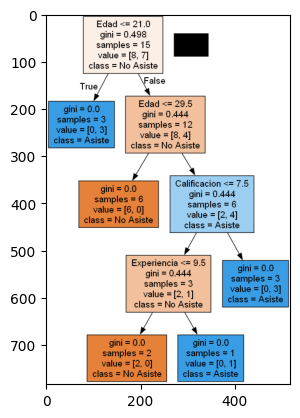

In [22]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

clase = ['No Asiste', 'Asiste'] 

datos = tree.export_graphviz(clasificador, 
                            class_names=clase,
                            feature_names=vi,
                            filled=True,
                            )
graph = pydotplus.graph_from_dot_data(datos)
graph.write_png('miarbol2.png')
imagen = pltimg.imread('miarbol2.png')
plt.imshow(imagen)
plt.show